# Naive Bayes

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
! ls '/content/drive/My Drive/Applied AI/Datasets/New Donors/'

glove_vectors	  Preprocessed_inc_others.csv  train_data.csv
PreProcessed.csv  resources.csv


### Importing data

In [104]:
data = pd.read_csv('/content/drive/My Drive/Applied AI/Datasets/New Donors/Preprocessed_inc_others.csv')
data.head()

,Unnamed: 0,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,title,quantity,sentiment_score,No of words in project title,No of words in essay
0,0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home,23,0.323506,5,175
1,1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,wanted projector hungry learners,1,0.293008,4,179
2,2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,soccer equipment awesome middle school students,22,0.313000,6,116
3,3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,techie kindergarteners,4,0.123264,2,127
4,4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,interactive math tools,4,0.160651,3,114


In [105]:
data.describe()

,Unnamed: 0,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,sentiment_score,No of words in project title,No of words in essay
count,109248.000000,109248.000000,109248.000000,109248.000000,109248.000000,109248.000000,109248.000000,109248.000000
mean,54623.500000,11.153165,0.848583,298.119343,16.965610,0.210069,4.329754,151.406369
std,31537.325441,27.777154,0.358456,367.498030,26.182942,0.083568,1.779834,38.986772
min,0.000000,0.000000,0.000000,0.660000,1.000000,-0.189744,1.000000,76.000000
25%,27311.750000,0.000000,1.000000,104.310000,4.000000,0.154350,3.000000,121.000000
50%,54623.500000,2.000000,1.000000,206.220000,9.000000,0.208285,4.000000,141.000000
75%,81935.250000,9.000000,1.000000,379.000000,21.000000,0.264347,5.000000,172.000000
max,109247.000000,451.000000,1.000000,9999.000000,930.000000,0.663333,18.000000,339.000000


In [106]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,Unnamed: 0,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,title,quantity,sentiment_score,No of words in project title,No of words in essay
0,0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,educational support english learners home,23,0.323506,5,175


In [0]:
y = y.reshape(-1,1)

In [108]:
print(X.shape)
print(y.shape)

(109248, 14)
(109248, 1)


### Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [110]:
print(data_train.shape)
print(data_test.shape)
print(label_train.shape)
print(label_test.shape)

(73196, 14)
(36052, 14)
(73196, 1)
(36052, 1)


In [0]:
X_train = data_train
X_test = data_test
y_train = label_train
y_test = label_test

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(73196, 14)
(36052, 14)
(73196, 1)
(36052, 1)


## 1. Vectorizing all the features

### 1.1 School State

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_1 = CountVectorizer(list(X_train['school_state'].values), lowercase=False, binary=True)

In [0]:
X_train_Sstate = vectorizer_1.fit_transform(X_train['school_state'].values)
X_test_Sstate = vectorizer_1.transform(X_test['school_state'].values)

In [115]:
print(X_train_Sstate.shape)
print(X_test_Sstate.shape)

(73196, 51)
(36052, 51)


### 1.2 Clean_Categories

In [116]:
X_train.head(1)

,Unnamed: 0,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,title,quantity,sentiment_score,No of words in project title,No of words in essay
76564,76564,ks,mrs,grades_prek_2,13,literacy_language math_science,literacy mathematics,our school title i elementary school located s...,742.2,ipads stem stations,4,0.210884,3,125


In [0]:
vectorizer_2 = CountVectorizer(list(X_train['clean_categories'].values),lowercase=False, binary=True)

In [0]:
X_train_cat = vectorizer_2.fit_transform(X_train['clean_categories'].values)
X_test_cat = vectorizer_2.transform(X_test['clean_categories'].values)

In [119]:
print(X_train_cat.shape)
print(X_test_cat.shape)

(73196, 9)
(36052, 9)


### 1.3 Clean sub_categories

In [0]:
vectorizer_3 = CountVectorizer(list(X_train['clean_subcategories'].values), lowercase=False, binary=True)

In [0]:
X_train_subcat = vectorizer_3.fit_transform(X_train['clean_subcategories'].values)
X_test_subcat = vectorizer_3.transform(X_test['clean_subcategories'].values)

In [122]:
print(X_train_subcat.shape)
print(X_test_subcat.shape)

(73196, 30)
(36052, 30)


### 1.4 Project Grade Category

In [0]:
vectorizer_4 = CountVectorizer(list(X_train['project_grade_category'].values), lowercase=False, binary=True)

In [0]:
X_train_grade = vectorizer_4.fit_transform(X_train['project_grade_category'].values)
X_test_grade = vectorizer_4.transform(X_test['project_grade_category'].values)

In [125]:
print(X_train_grade.shape)
print(X_test_grade.shape)

(73196, 4)
(36052, 4)


### 1.5 Teacher Prefix

In [0]:
vectorizer_5 = CountVectorizer(list(X_train['teacher_prefix'].values), lowercase=False, binary=True)

In [0]:
X_train_prefix = vectorizer_5.fit_transform(X_train['teacher_prefix'].values)
X_test_prefix = vectorizer_5.transform(X_test['teacher_prefix'].values)

In [128]:
print(X_train_prefix.shape)
print(X_test_prefix.shape)

(73196, 5)
(36052, 5)


### 1.6 Essay 

#### 1.6.1 BOW

In [0]:
vectorizer_6 = CountVectorizer(list(X_train['essay'].values), min_df=10)

In [0]:
#We are considering the words which atleast in atleat 10 documents
X_train_essay_bow = vectorizer_6.fit_transform(X_train['essay'].values)
X_test_essay_bow = vectorizer_6.transform(X_test['essay'].values)

In [131]:
print(X_train_essay_bow.shape)
print(X_test_essay_bow.shape)

(73196, 14266)
(36052, 14266)


#### 1.6.2 TFIDF 

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_7 = TfidfVectorizer(list(X_train['essay'].values), min_df=10)

In [0]:
X_train_essay_tfidf = vectorizer_7.fit_transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_7.transform(X_test['essay'].values)

In [134]:
print(X_train_essay_tfidf.shape)
print(X_test_essay_tfidf.shape)

(73196, 14266)
(36052, 14266)


### 1.7 PROJECT TITLE

#### 1.7.1 BOW

In [0]:
vectorizer_8 = CountVectorizer(list(X_train['title'].values), min_df=10)

In [0]:
X_train_title_bow = vectorizer_8.fit_transform(X_train['title'].values)
X_test_title_bow = vectorizer_8.transform(X_test['title'].values)

In [137]:
print(X_train_title_bow.shape)
print(X_test_title_bow.shape)

(73196, 2617)
(36052, 2617)


#### 1.7.2 TFIDF

In [0]:
vectorizer_9 = TfidfVectorizer(list(X_train['title'].values), min_df=10)

In [0]:
X_train_title_tfidf = vectorizer_9.fit_transform(X_train['title'].values)
X_test_title_tfidf = vectorizer_9.transform(X_test['title'].values)

In [140]:
print(X_train_title_tfidf.shape)
print(X_test_title_tfidf.shape)

(73196, 2617)
(36052, 2617)


### 1.8 Price

#### Note :
  - Since the Naive Bayes will not process with negative values and we can't standardize it

In [0]:
X_train_price = X_train['price'].values.reshape(-1,1)
X_test_price = X_test['price'].values.reshape(-1,1)

In [142]:
print(X_train_price.shape)
print(X_test_price.shape)

(73196, 1)
(36052, 1)


### 1.9 Previously posted projects

In [0]:
X_train_previous = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_test_previous = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

In [144]:
print(X_train_previous.shape)
print(X_test_previous.shape)

(73196, 1)
(36052, 1)


## 2. SET-1

### 2.1 Merge all the features

In [43]:
print(X_train_Sstate.shape)
print(X_train_cat.shape)
print(X_train_subcat.shape)
print(X_train_grade.shape)
print(X_train_prefix.shape)
print(X_train_essay_bow.shape)
print(X_train_essay_tfidf.shape)
print(X_train_title_bow.shape)
print(X_train_title_tfidf.shape)
print(X_train_price.shape)
print(X_train_previous.shape)
print('='*50)
print(X_test_Sstate.shape)
print(X_test_cat.shape)
print(X_test_subcat.shape)
print(X_test_grade.shape)
print(X_test_prefix.shape)
print(X_test_essay_bow.shape)
print(X_test_essay_tfidf.shape)
print(X_test_title_bow.shape)
print(X_test_title_tfidf.shape)
print(X_test_price.shape)
print(X_test_previous.shape)

(73196, 51)
(73196, 9)
(73196, 30)
(73196, 4)
(73196, 5)
(73196, 14266)
(73196, 14266)
(73196, 2617)
(73196, 2617)
(73196, 1)
(73196, 1)
(36052, 51)
(36052, 9)
(36052, 30)
(36052, 4)
(36052, 5)
(36052, 14266)
(36052, 14266)
(36052, 2617)
(36052, 2617)
(36052, 1)
(36052, 1)


In [0]:
from scipy.sparse import hstack
X_train_1 = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix, X_train_essay_bow, X_train_title_bow, X_train_previous, X_train_price)).tocsr()
X_test_1 = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix, X_test_essay_bow, X_test_title_bow, X_test_previous, X_test_price)).tocsr()

In [57]:
print(X_train_1.shape)
print(X_test_1.shape)

(73196, 16984)
(36052, 16984)


### 2.2 Grid Search CV 

In [0]:
from sklearn.naive_bayes import MultinomialNB
classifier_1 = MultinomialNB()

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = [
                {
                    'alpha' : [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
                }
            ]
gridsearch_1 = GridSearchCV(classifier_1, parameters, scoring='roc_auc', cv=10, n_jobs=-1, return_train_score=True)

In [60]:
print(X_train_1.shape)
print(y_train.shape)

(73196, 16984)
(73196, 1)


In [61]:
gridsearch_1 = gridsearch_1.fit(X_train_1, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
import warnings
warnings.filterwarnings('ignore')
results = pd.DataFrame.from_dict(gridsearch_1.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.137218,0.014056,0.014372,0.001395,0.0001,{'alpha': 0.0001},0.650117,0.655750,0.642813,0.652477,0.651696,0.651221,0.648106,0.643093,0.655809,0.657584,0.650867,0.004799,6,0.690553,0.690443,0.689916,0.689173,0.689908,0.690844,0.690458,0.689906,0.689971,0.690882,0.690205,0.000499
1,0.123135,0.004729,0.012991,0.000809,0.001,{'alpha': 0.001},0.650303,0.656382,0.643145,0.653639,0.651511,0.652487,0.649429,0.642724,0.657344,0.657707,0.651467,0.005046,5,0.687399,0.687237,0.686792,0.686037,0.686754,0.687639,0.687330,0.686845,0.686794,0.687674,0.687050,0.000475
2,0.118874,0.005027,0.013573,0.001144,0.01,{'alpha': 0.01},0.650659,0.656824,0.643665,0.654611,0.651269,0.653587,0.650197,0.643227,0.659356,0.657854,0.652125,0.005224,4,0.683826,0.683715,0.683340,0.682529,0.683247,0.684060,0.683841,0.683439,0.683260,0.684129,0.683539,0.000454
3,0.113551,0.004523,0.012937,0.000709,0.1,{'alpha': 0.1},0.650738,0.656396,0.644390,0.654470,0.651449,0.654120,0.650244,0.642982,0.660563,0.657461,0.652281,0.005258,3,0.679865,0.679737,0.679564,0.678551,0.679304,0.679991,0.679877,0.679585,0.679221,0.680042,0.679574,0.000429
4,0.111400,0.001876,0.015732,0.003122,1,{'alpha': 1},0.651656,0.657538,0.645051,0.655644,0.651542,0.654932,0.650342,0.642621,0.661592,0.657721,0.652864,0.005560,2,0.675031,0.674914,0.674777,0.673912,0.674454,0.675002,0.675058,0.674881,0.674272,0.675256,0.674756,0.000394


In [63]:
best_alpha_1 = gridsearch_1.best_params_['alpha']
print('best_alhpa:', best_alpha_1)

best_alhpa: 10


#### Summary:
    - It shows that the best alpha = 10

### 2.3 AUC vs Hyperparameter

In [0]:
train_auc_1 = results['mean_train_score']
test_auc_1 = results['mean_test_score']
alpha_1 = results['param_alpha']

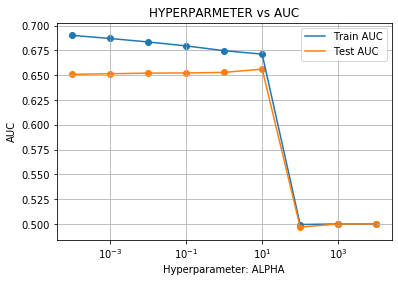

In [65]:
plt.plot(alpha_1, train_auc_1, label='Train AUC')
plt.plot(alpha_1, test_auc_1, label='Test AUC')
plt.scatter(alpha_1, train_auc_1)
plt.scatter(alpha_1, test_auc_1)

plt.title('HYPERPARMETER vs AUC')
plt.xlabel('Hyperparameter: ALPHA')
plt.ylabel('AUC')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### 2.4 Modelling with alpha = 10

In [66]:
classifier_withAlpha_1 = MultinomialNB(alpha=10)
classifier_withAlpha_1.fit(X_train_1, y_train)

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

### 2.5 Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
cv_1 = cross_val_score(estimator=classifier_withAlpha_1, X=X_train_1, y=y_train,cv=10, scoring='roc_auc')

In [165]:
best_auc_1 = cv_1.mean()
print('Best AUC:%4f' %best_auc_1)

Best AUC:0.656119


### 2.6 AUC curve for Train and Test

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 != 0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        
    return y_data_pred

In [0]:
y_train_pred_1 = batch_predict(classifier_withAlpha_1, X_train_1)
y_test_pred_1 = batch_predict(classifier_withAlpha_1, X_test_1)

In [0]:
from sklearn.metrics import roc_curve, auc
train_fpr_1, train_tpr_1, train_thresh_1 = roc_curve(y_train, y_train_pred_1)
test_fpr_1, test_tpr_1, test_thresh_1 = roc_curve(y_test, y_test_pred_1)

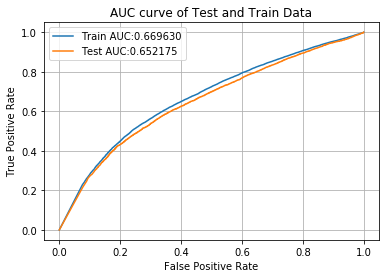

In [72]:
plt.plot(train_fpr_1, train_tpr_1, label='Train AUC:%4f'%auc(train_fpr_1, train_tpr_1))
plt.plot(test_fpr_1, test_tpr_1, label='Test AUC:%4f'%auc(test_fpr_1, test_tpr_1))

plt.title('AUC curve of Test and Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

### 2.7 Confusion Matrix

In [0]:
def find_best_threshold(fpr, tpr, threhsold):
    t = threhsold[np.argmax(tpr*(1-fpr))]
    print('The maximum tpr*(1-fpr) is:', max(tpr*(1-fpr)), 'for threshold', (np.round(t,3)))
    return t

In [74]:
best_t = find_best_threshold(train_fpr_1, train_tpr_1, train_thresh_1)

The maximum tpr*(1-fpr) is: 0.3970900910561266 for threshold 1.0


In [0]:
def predict_with_threshold(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [0]:
from sklearn.metrics import confusion_matrix
cm_train_1 = confusion_matrix(y_train, predict_with_threshold(y_train_pred_1, best_t))
cm_test_1 = confusion_matrix(y_test, predict_with_threshold(y_test_pred_1, best_t))

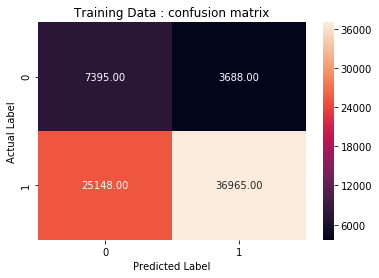

In [77]:
sns.heatmap(cm_train_1, annot=True, fmt='.2f')
plt.title('Training Data : confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

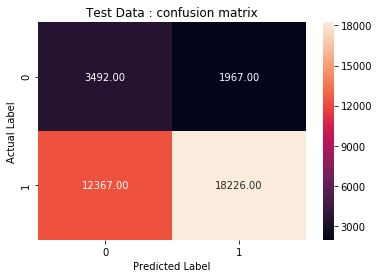

In [78]:
sns.heatmap(cm_test_1, annot=True, fmt='.2f')
plt.title('Test Data : confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## 2. 8 Top 20 Features

In [0]:
#https://datascience.stackexchange.com/questions/65219/find-the-top-n-features-from-feature-set-using-absolute-values-of-feature-log-p/65232#65232
features_list = list( vectorizer_1.get_feature_names() +vectorizer_2.get_feature_names() +vectorizer_3.get_feature_names() +\
                    vectorizer_4.get_feature_names() +vectorizer_5.get_feature_names() +vectorizer_6.get_feature_names() +\
                     vectorizer_8.get_feature_names() + ["teacher_number_of_previously_posted_projects"] + ["Price"]
                    )

In [80]:
len(features_list)

16984

In [0]:
#For postive class , we get the indices 
sorted_prob_class1_ind = classifier_withAlpha_1.feature_log_prob_[1,:].argsort()

#For Negative Class
sorted_prob_class0_ind = classifier_withAlpha_1.feature_log_prob_[0, :].argsort()

In [82]:
sorted_prob_class0_ind[-20:-1]

array([10356,  7712,  2656, 14215,  8520, 13980,  7876,  8463, 12863,
        6137, 12901,  7438,  8662,  2494,  8439,  7442, 11231, 16982,
       12371])

In [0]:
#https://www.geeksforgeeks.org/python-get-last-n-elements-from-given-list/
#since argsort gives it in ascending order we need the last 20 eleemnts
Most_important_word_for_1 = []
Most_important_word_for_0 = []

for i in (sorted_prob_class1_ind[-20:-1]):
    Most_important_word_for_1.append(features_list[i])
    
for j in (sorted_prob_class0_ind[-20:-1]):
    Most_important_word_for_0.append(features_list[j])

In [84]:
print('Top 20 words in Postive Class')
print(Most_important_word_for_1)
print('='*50)
print('Top 20 words in Negative class')
print(Most_important_word_for_0)

Top 20 words in Postive Class
['love', 'use', 'reading', 'work', 'need', 'we', 'nannan', 'many', 'help', 'learn', 'not', 'they', 'the', 'classroom', 'learning', 'my', 'school', 'students', 'teacher_number_of_previously_posted_projects']
Top 20 words in Negative class
['reading', 'love', 'come', 'work', 'need', 'we', 'many', 'nannan', 'the', 'help', 'they', 'learn', 'not', 'classroom', 'my', 'learning', 'school', 'teacher_number_of_previously_posted_projects', 'students']


## 3. Set 2

### 3.1 Merge all the features

In [0]:
from scipy.sparse import hstack
X_train_2 = hstack((X_train_Sstate, X_train_cat, X_train_subcat, X_train_grade, X_train_prefix, X_train_essay_tfidf, X_train_title_tfidf, X_train_previous, X_train_price)).tocsr()
X_test_2 = hstack((X_test_Sstate, X_test_cat, X_test_subcat, X_test_grade, X_test_prefix, X_test_essay_tfidf, X_test_title_tfidf, X_test_previous, X_test_price)).tocsr()

In [146]:
print(X_train_2.shape)
print(X_test_2.shape)

(73196, 16984)
(36052, 16984)


### 3.2 Grid Search 

In [0]:
classifier_2 = MultinomialNB()

In [0]:
parameters = [
                {
                    'alpha' : [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
                }
            ]
gridsearch_2 = GridSearchCV(estimator=classifier_2, param_grid=parameters, scoring='roc_auc', n_jobs=-1, cv=10, return_train_score=True)

In [0]:
gridsearch_2 = gridsearch_2.fit(X_train_2, y_train)

In [91]:
results = pd.DataFrame.from_dict(gridsearch_2.cv_results_)
results = results.sort_values(['param_alpha'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.122821,0.004070,0.013092,0.000593,0.0001,{'alpha': 0.0001},0.613831,0.622304,0.604165,0.614101,0.617293,0.616018,0.619644,0.610097,0.634412,0.617751,0.616962,0.007555,4,0.641152,0.640464,0.641889,0.640512,0.640424,0.640687,0.640593,0.640847,0.639039,0.640579,0.640619,0.000673
1,0.127190,0.004452,0.013374,0.000319,0.001,{'alpha': 0.001},0.614316,0.622410,0.604743,0.614506,0.617250,0.616775,0.619684,0.610100,0.634888,0.617687,0.617236,0.007535,3,0.638535,0.637846,0.639239,0.637914,0.637828,0.638063,0.637959,0.638316,0.636434,0.637974,0.638011,0.000666
2,0.123700,0.005153,0.013480,0.000411,0.01,{'alpha': 0.01},0.614795,0.622272,0.605342,0.614895,0.617053,0.617543,0.619568,0.609953,0.635228,0.617714,0.617436,0.007486,1,0.635647,0.634988,0.636323,0.635041,0.634989,0.635180,0.635060,0.635544,0.633566,0.635109,0.635145,0.000660
3,0.129093,0.011464,0.013330,0.000664,0.1,{'alpha': 0.1},0.615036,0.621804,0.605729,0.615136,0.616436,0.618078,0.619200,0.609427,0.635182,0.617591,0.617362,0.007421,2,0.632031,0.631424,0.632687,0.631460,0.631454,0.631589,0.631437,0.632081,0.629989,0.631530,0.631568,0.000655
4,0.122390,0.002708,0.014902,0.002513,1,{'alpha': 1},0.614182,0.620320,0.605264,0.614354,0.614918,0.617424,0.618698,0.608077,0.634776,0.616203,0.616422,0.007510,5,0.626492,0.625938,0.627111,0.625967,0.626033,0.626062,0.625820,0.626698,0.624352,0.626012,0.626049,0.000685


In [92]:
best_alpha_2 = gridsearch_2.best_params_['alpha']
print('best_alhpa:', best_alpha_2)

best_alhpa: 0.01


### Summary:
    - It shows that the best alpha could be 0.01

### 3.3 Plotting AUC vs Hyperparameter

In [0]:
train_auc_2 = results['mean_train_score']
test_auc_2 = results['mean_test_score']
alpha_2 = results['param_alpha']

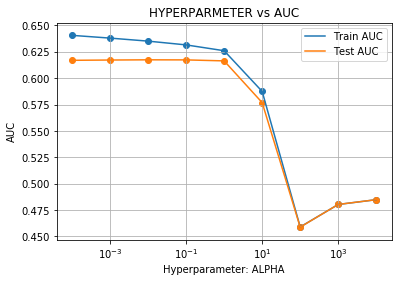

In [96]:
plt.plot(alpha_2, train_auc_2, label='Train AUC')
plt.plot(alpha_2, test_auc_2, label='Test AUC')
plt.scatter(alpha_2, train_auc_2)
plt.scatter(alpha_2, test_auc_2)

plt.title('HYPERPARMETER vs AUC')
plt.xlabel('Hyperparameter: ALPHA')
plt.ylabel('AUC')
plt.xscale('log')
plt.legend()
plt.grid()
plt.show()

### Summary
    - Here also it shows that the AUC is high when alpha = 1

### 3.4 Modelling with Parameters

In [147]:
classifier_withAlpha_2 = MultinomialNB(alpha=best_alpha_2)
classifier_withAlpha_2.fit(X_train_2, y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

### 3.5 Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
cv_2 = cross_val_score(estimator=classifier_withAlpha_2, X=X_train_2, y=y_train,cv=10, scoring='roc_auc')

In [149]:
best_auc_2 = cv_2.mean()
print('Best AUC:%4f' %best_auc_2)

Best AUC:0.617436


### 3.6 Plotting ROC curve

In [0]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0,tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 != 0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        
    return y_data_pred

In [0]:
y_train_pred_2 = batch_predict(classifier_withAlpha_2, X_train_2)
y_test_pred_2 = batch_predict(classifier_withAlpha_2, X_test_2)

In [0]:
from sklearn.metrics import roc_curve, auc
train_fpr_2, train_tpr_2, train_thresh_2 = roc_curve(y_train, y_train_pred_2)
test_fpr_2, test_tpr_2, test_thresh_2 = roc_curve(y_test, y_test_pred_2)

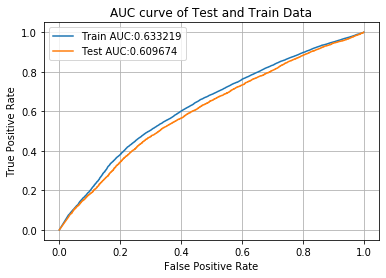

In [153]:
plt.plot(train_fpr_2, train_tpr_2, label='Train AUC:%4f'%auc(train_fpr_2, train_tpr_2))
plt.plot(test_fpr_2, test_tpr_2, label='Test AUC:%4f'%auc(test_fpr_2, test_tpr_2))

plt.title('AUC curve of Test and Train Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

### 3.7 Confusion Matrix

In [154]:
def find_best_threshold(fpr, tpr, threhsold):
    t = threhsold[np.argmax(tpr*(1-fpr))]
    print('The maximum tpr*(1-fpr) is:', max(tpr*(1-fpr)), 'for threshold', (np.round(t,3)))
    return t


best_t = find_best_threshold(train_fpr_2, train_tpr_2, train_thresh_2)

The maximum tpr*(1-fpr) is: 0.3606844925473015 for threshold 0.685


In [0]:
def predict_with_threshold(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
            
    return predictions

In [0]:
from sklearn.metrics import confusion_matrix
cm_train_2 = confusion_matrix(y_train, predict_with_threshold(y_train_pred_2, best_t))
cm_test_2 = confusion_matrix(y_test, predict_with_threshold(y_test_pred_2, best_t))

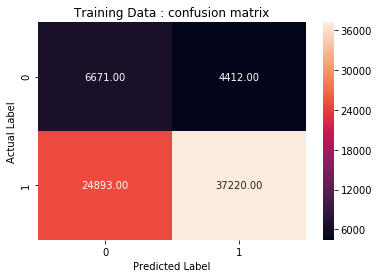

In [157]:
sns.heatmap(cm_train_2, annot=True, fmt='.2f')
plt.title('Training Data : confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

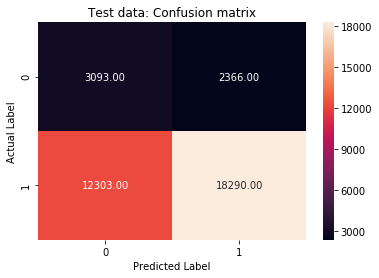

In [158]:
sns.heatmap(cm_test_2, annot=True, fmt='.2f')
plt.title('Test data: Confusion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## 3.8 Top 20 Features

In [0]:
#https://datascience.stackexchange.com/questions/65219/find-the-top-n-features-from-feature-set-using-absolute-values-of-feature-log-p/65232#65232
features_list = list( vectorizer_1.get_feature_names() +vectorizer_2.get_feature_names() +vectorizer_3.get_feature_names() +\
                    vectorizer_4.get_feature_names() +vectorizer_5.get_feature_names() +vectorizer_7.get_feature_names() +\
                     vectorizer_9.get_feature_names() + ["teacher_number_of_previously_posted_projects"] + ["Price"]
                    )

In [0]:
#For postive class , we get the indices 
sorted_prob_class1_ind_2 = classifier_withAlpha_2.feature_log_prob_[1,:].argsort()

#For Negative Class
sorted_prob_class0_ind_2 = classifier_withAlpha_2.feature_log_prob_[0, :].argsort()

In [0]:
#https://www.geeksforgeeks.org/python-get-last-n-elements-from-given-list/
#since argsort gives it in ascending order we need the last 20 eleemnts
Most_important_word_for_postive_2 = []
Most_important_word_for_neagtive_2 = []

for i in (sorted_prob_class1_ind_2[-20:-1]):
    Most_important_word_for_postive_2.append(features_list[i])
    
for j in (sorted_prob_class0_ind_2[-20:-1]):
    Most_important_word_for_neagtive_2.append(features_list[j])

In [162]:
print('Top 20 words in Postive Class')
print(Most_important_word_for_1)
print('='*50)
print('Top 20 words in Negative class')
print(Most_important_word_for_0)

Top 20 words in Postive Class
['love', 'use', 'reading', 'work', 'need', 'we', 'nannan', 'many', 'help', 'learn', 'not', 'they', 'the', 'classroom', 'learning', 'my', 'school', 'students', 'teacher_number_of_previously_posted_projects']
Top 20 words in Negative class
['reading', 'love', 'come', 'work', 'need', 'we', 'many', 'nannan', 'the', 'help', 'they', 'learn', 'not', 'classroom', 'my', 'learning', 'school', 'teacher_number_of_previously_posted_projects', 'students']


## Summary

In [168]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ['Vectorizer', 'Model', 'Alpha', 'AUC']
x.add_row(['BOW', 'Naive Bayes', str(best_alpha_1), str('%4f'%best_auc_1)])
x.add_row(['TFIDF', 'Naive Bayes', str(best_alpha_2), str('%4f'%best_auc_2)])
print(x)

+------------+-------------+-------+----------+
| Vectorizer |    Model    | Alpha |   AUC    |
+------------+-------------+-------+----------+
|    BOW     | Naive Bayes |   10  | 0.656119 |
|   TFIDF    | Naive Bayes |  0.01 | 0.617436 |
+------------+-------------+-------+----------+


### Note : That's the end of the code